In [2]:
# Accessing historical stock prices data from yahoo finance

import yfinance as yf
goog = yf.Ticker("GOOG")
goog_history = goog.history(period="1mo")
print(goog_history)

                                 Open        High         Low       Close  \
Date                                                                        
2025-07-23 00:00:00-04:00  192.360001  193.360001  190.179993  191.509995   
2025-07-24 00:00:00-04:00  198.110001  198.970001  191.949997  193.199997   
2025-07-25 00:00:00-04:00  192.929993  195.274994  192.130005  194.080002   
2025-07-28 00:00:00-04:00  194.410004  194.820007  191.854996  193.419998   
2025-07-29 00:00:00-04:00  193.300003  196.660004  192.990005  196.429993   
2025-07-30 00:00:00-04:00  196.300003  198.479996  195.559998  197.440002   
2025-07-31 00:00:00-04:00  196.600006  196.830002  192.080002  192.860001   
2025-08-01 00:00:00-04:00  189.779999  191.617996  188.699997  189.949997   
2025-08-04 00:00:00-04:00  191.175003  196.080002  190.919998  195.750000   
2025-08-05 00:00:00-04:00  195.544998  198.699997  194.675003  195.320007   
2025-08-06 00:00:00-04:00  195.250000  197.380005  194.466995  196.919998   

In [3]:
# Saving the historical data to a CSV file for our use
goog_history = goog.history(period="1mo")
goog_history.to_csv("goog_history.csv")

In [5]:
%pip install pandas_datareader
import pandas_datareader as web

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install prophet
import prophet

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
data = pd.read_csv("goog_history.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-07-23 00:00:00-04:00,192.360001,193.360001,190.179993,191.509995,34068100,0.0,0.0
1,2025-07-24 00:00:00-04:00,198.110001,198.970001,191.949997,193.199997,45252100,0.0,0.0
2,2025-07-25 00:00:00-04:00,192.929993,195.274994,192.130005,194.080002,31101800,0.0,0.0
3,2025-07-28 00:00:00-04:00,194.410004,194.820007,191.854996,193.419998,25553500,0.0,0.0
4,2025-07-29 00:00:00-04:00,193.300003,196.660004,192.990005,196.429993,31891600,0.0,0.0


In [3]:
data = data.drop(['Dividends', 'Stock Splits'], axis=1)

In [4]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2025-07-23 00:00:00-04:00,192.360001,193.360001,190.179993,191.509995,34068100
1,2025-07-24 00:00:00-04:00,198.110001,198.970001,191.949997,193.199997,45252100
2,2025-07-25 00:00:00-04:00,192.929993,195.274994,192.130005,194.080002,31101800
3,2025-07-28 00:00:00-04:00,194.410004,194.820007,191.854996,193.419998,25553500
4,2025-07-29 00:00:00-04:00,193.300003,196.660004,192.990005,196.429993,31891600


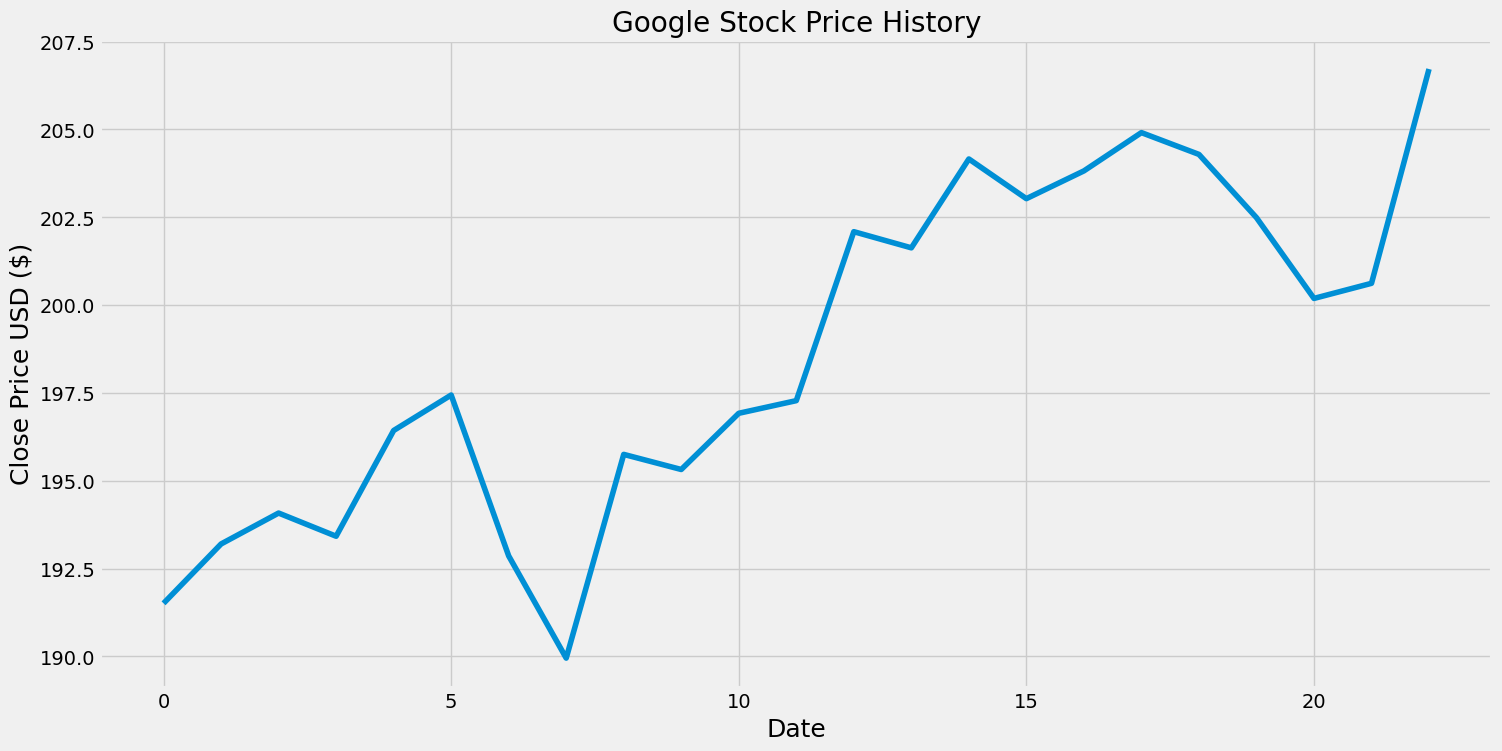

In [5]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.title('Google Stock Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
data = data[["Date","Close"]] 
data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2025-07-23 00:00:00-04:00,191.509995
1,2025-07-24 00:00:00-04:00,193.199997
2,2025-07-25 00:00:00-04:00,194.080002
3,2025-07-28 00:00:00-04:00,193.419998
4,2025-07-29 00:00:00-04:00,196.429993


In [8]:
data['ds'] = pd.to_datetime(data['ds']).dt.tz_localize(None)
data.head()

,ds,y
0,2025-07-23,191.509995
1,2025-07-24,193.199997
2,2025-07-25,194.080002
3,2025-07-28,193.419998
4,2025-07-29,196.429993


In [9]:
from prophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(data)

13:24:20 - cmdstanpy - INFO - Chain [1] start processing
13:24:21 - cmdstanpy - INFO - Chain [1] done processing


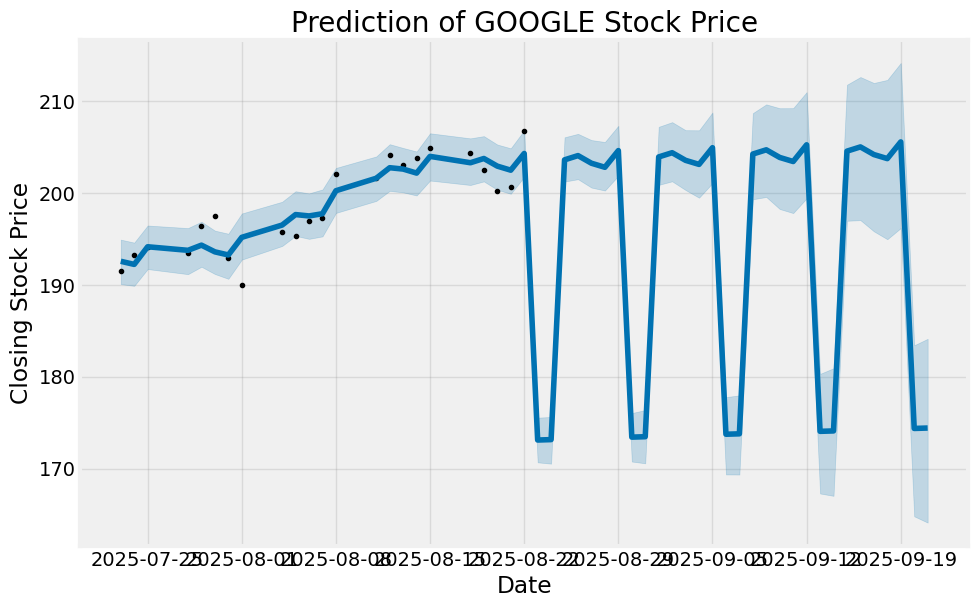

In [10]:
future = m.make_future_dataframe(periods=30)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of GOOGLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

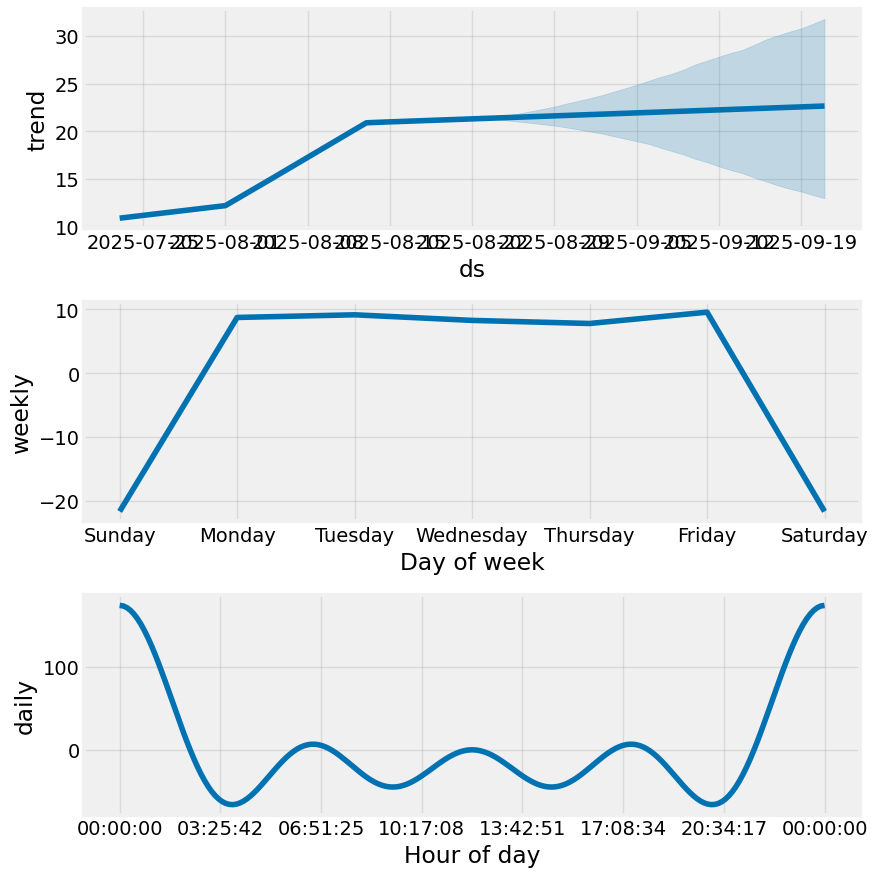

In [11]:
m.plot_components(predictions)
plt.show()